## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [6]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=",")
data # посмотрим на датасет

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [34]:
data.isnull().sum() # с помощью данного метода увидим, что пропущенные значения отсутствуют

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Поделим признаки на группы

**Количественные:**
- duration
- amount
- age

**Бинарные:**
- telephone
- foreign_worker
- credit_risk
- people_liable

**Порядковые:**
- employment_duration
- installment_rate
- present_residence 
- number_credits
- savings
- job

**Категориальные:**
- status
- credit_history
- purpose
- personal_status_sex
- other_debtors
- property
- other_installment_plans
- housing

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [32]:
((data['age']<30) & (data['housing'] == 'rent')).sum()/(data['age']<30).sum() * 100 
# процент клиентов моложе 30 лет, которые снимают жилье

66.66666666666666

In [11]:
((data['age']>40) & (data['housing'] == 'rent')).sum()/(data['age']>40).sum() * 100 
# процент клиентов старше 40 лет, которые снимают жилье

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [30]:
((data['foreign_worker'] == 'yes') & (data['number_credits'] == ('4-5' or '>=6'))).sum() 

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

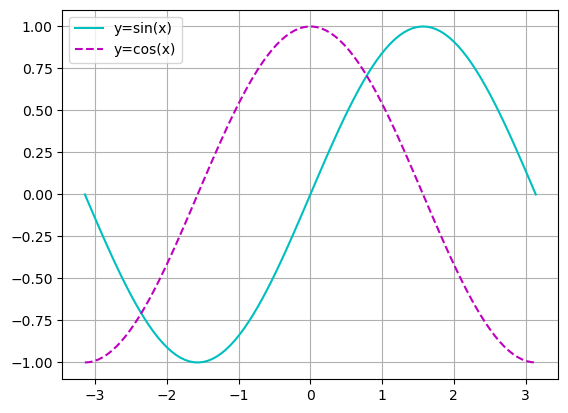

In [14]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, 'c', label='y=sin(x)')
plt.plot(x, y2, 'm--', label='y=cos(x)')
plt.legend(loc='upper left')
plt.grid(True)

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
df1 = data[data['credit_risk'] == 'good'].groupby('status').agg({'credit_risk': 'count'})
df2 = data[data['credit_risk'] == 'bad'].groupby('status').agg({'credit_risk': 'count'})

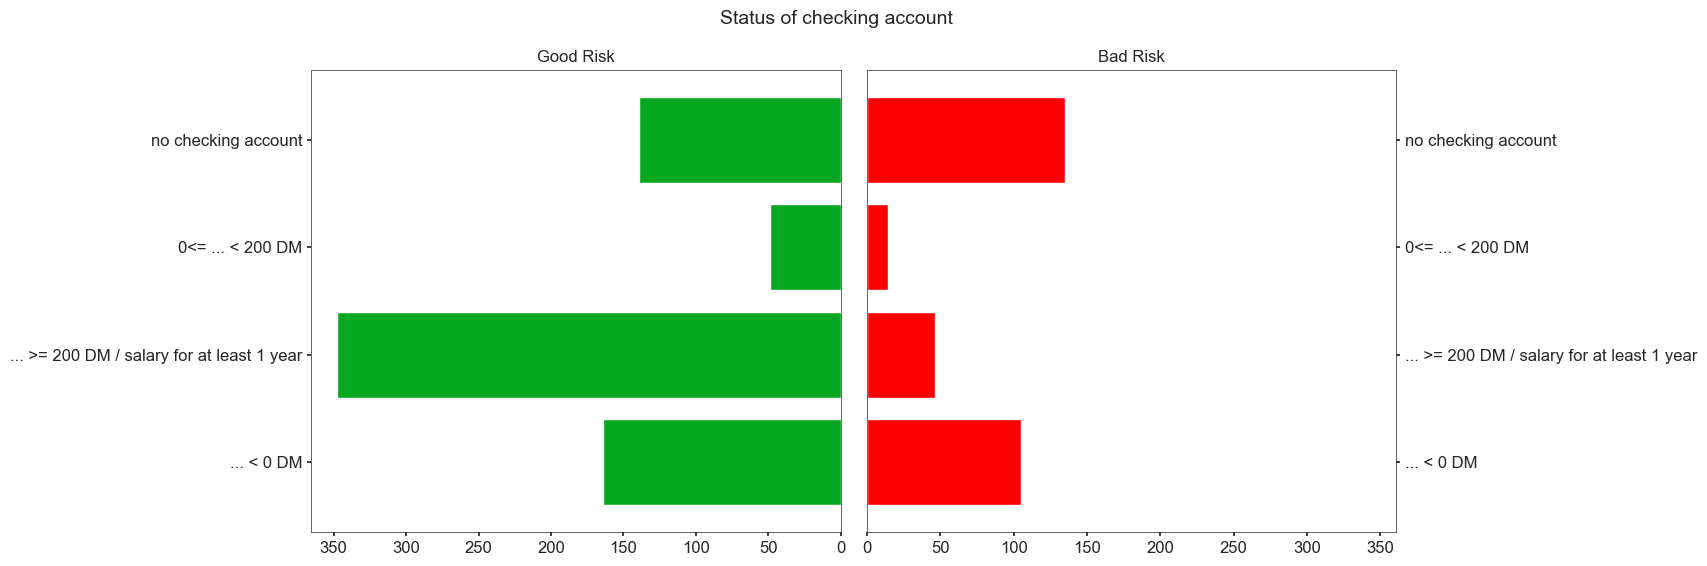

In [544]:
fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Status of checking account', fontsize = 14)
fig1.set_title("Good Risk", fontsize = 12)
fig2.set_title("Bad Risk", fontsize = 12)
df1.plot(kind='barh', ax=fig1, fontsize = 12, 
         color = '#05A71E', legend=None, xlabel='', width = 0.8).invert_xaxis()
fig2.yaxis.tick_right()
df2.plot(kind='barh', ax=fig2, fontsize = 12, 
         color = '#FF0000', legend=None, xlabel='', width = 0.8)
plt.xlim (0, 361)
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()


### Задание 8  (0.5 балла)

In [376]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

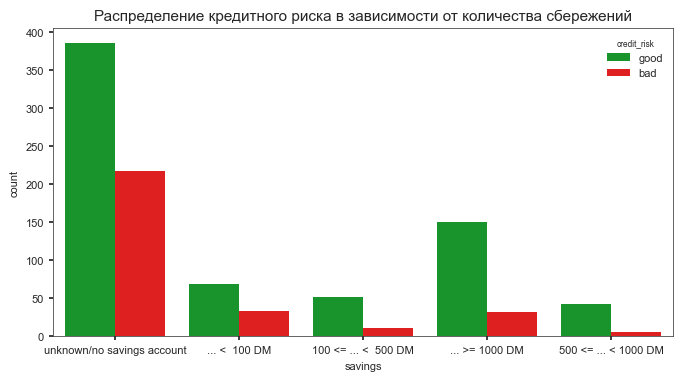

In [779]:
plt.figure(figsize=(8, 4))
sns.countplot(x='savings', hue = 'credit_risk', palette=['#05A71E',"#FF0000"], data=data)
plt.tick_params (axis='both', which='major', labelsize= 8)
plt.xlabel('savings', fontsize= 8 )
plt.ylabel('count', fontsize= 8 )
plt.legend(title='credit_risk', fontsize= 8 )
sns.set_style("ticks")
sns.set_context(rc={'axes.linewidth': 0.5, 'ytick.major.size': 3, 'xtick.major.size': 3})
plt.title('Распределение кредитного риска в зависимости от количества сбережений', fontsize = 11)
plt.show()

##### Выводы и комментарий по заданию:

На построение графика в Matplotlib ушло намного больше времени, всё же синтаксис в Seaborn несколько проще и понятнее.
Считаю, что делать однозначные выводы на основе лишь данного графика будет неверно — слишком много клиентов имеют категорию "unknown/no savings account", что осложняет оценку общей картины. Также, прежде чем сравнивать величины в относительном выражении стоит обратить внимание на следующий факт - мы изначально имеем меньшее кол-во наблюдений с категорией 'bad'.   

Тем не менее отмечу, что люди с зафондированными счетами вероятнее всего будут обладать "хорошим" кредитным рейтингом, и чем больше будет баланс (*DM - Deutsch Mark*), тем выше эта вероятность

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

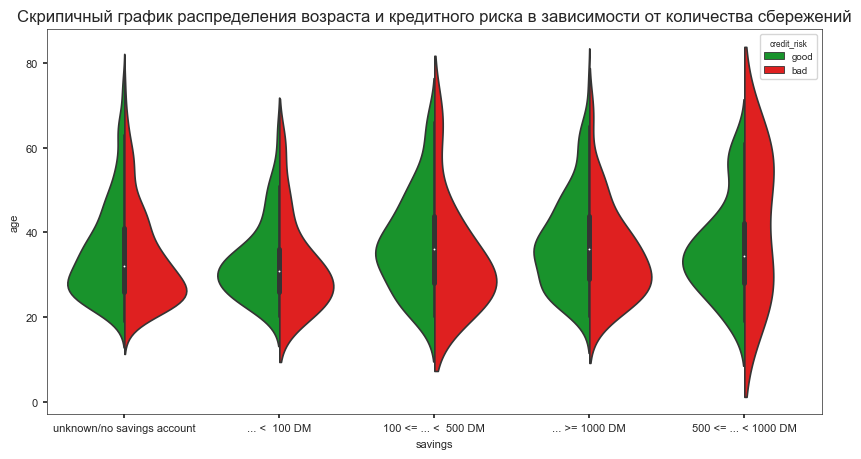

In [700]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='savings', y="age", hue="credit_risk", palette=['#05A71E',"#FF0000"], split=True, data=data, linewidth=1.2)
plt.tick_params (axis='x', which='major', labelsize= 8)
plt.tick_params (axis='y', which='major', labelsize= 8)
plt.xlabel('savings', fontsize= 8 )
plt.ylabel('age', fontsize= 8 )
plt.legend(title='credit_risk', fontsize= 7 )
sns.set (font_scale=0.5)
sns.set_style('white')
sns.set_style("ticks")
sns.set_context(rc={'axes.linewidth': 0.5, 'ytick.major.size': 3, 'xtick.major.size': 3})
plt.title('Скрипичный график распределения возраста и кредитного риска в зависимости от количества сбережений', fontsize = 12)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

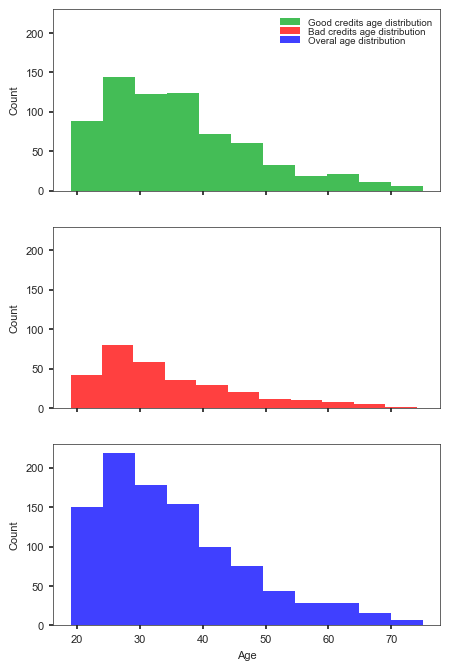

In [915]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(5,8))
a = sns.histplot(ax=axes[0], data=data[data['credit_risk'] == 'good']
                        , x='age', bins=11, color = '#05A71E')

sns.set_context(rc = {'patch.linewidth': 0.0})

b = sns.histplot(ax=axes[1], data=data[data['credit_risk'] == 'bad']
                        , x='age', bins=11, color = '#FF0000')

sns.set_context(rc = {'patch.linewidth': 0.0})

c = sns.histplot(ax=axes[2], data=data
                        , x='age', bins=11, color = 'blue')

sns.set_context(rc = {'patch.linewidth': 0.0})
for i in range(3):
    axes[i].set_ylim(0, 230)
    axes[i].set_ylabel('Count', fontsize= 8 )
    axes[i].tick_params (axis='x', which='major', labelsize= 8)
    axes[i].tick_params (axis='y', which='major', labelsize= 8)

plt.xlabel('Age', fontsize= 8 )
labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overal age distribution']
plt.figlegend(labels, bbox_to_anchor = (0.9, 0.88), ncol=1, labelspacing=0., fontsize = 7)
plt.show()

##### Выводы и комментарий по заданию:

Распределение возраста на каждом из графиков имеет существенную правостороннюю асимметрию. То есть большинство клиентов, которые подали заявку на кредит - лица возраста ~ 25 лет
Распределение, изобрвженное на первой и второй диаграммах в целом практически идентичны. Отсюда можем предположить, что кредитный риск и возраст потенциального заемщика являются **независимыми** факторами.
Ну и ввиду одинакового масштаба также вновь можем заметить, что количество клиентов с кредитным статусом 'good' превалирует над заемщиками со статусом 'bad'

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

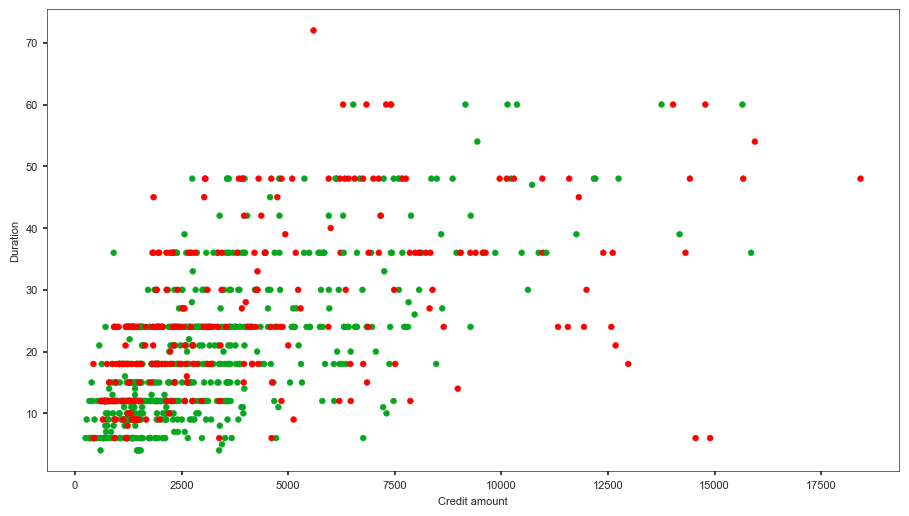

In [196]:
plt.figure(figsize=(11, 6))
sns.scatterplot(x='amount', y='duration', hue = 'credit_risk', palette=['#05A71E',"#FF0000"], data=data,
                legend = False, edgecolor=None, size = 1)
plt.xlabel('Credit amount', fontsize = 8 )
plt.ylabel('Duration', fontsize = 8 )
plt.tick_params (axis='x', which='major', labelsize= 8)
plt.tick_params (axis='y', which='major', labelsize= 8)
sns.set_style("ticks")
sns.set_context(rc={'axes.linewidth': 0.5, 'ytick.major.size': 3, 'xtick.major.size': 3})

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

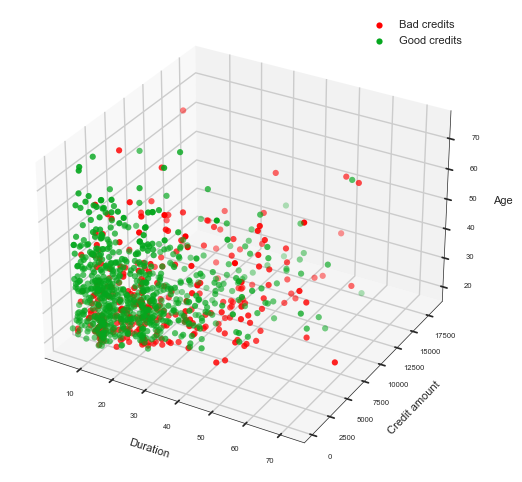

In [821]:
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data = data[data.credit_risk == 'bad'], xs = 'duration', ys = 'amount', zs = 'age', color = '#FF0000', label = 'Bad credits')
ax.scatter(data = data[data.credit_risk == 'good'], xs = 'duration', ys = 'amount', zs = 'age', color = '#05A71E', label = 'Good credits')
ax.legend(fontsize=8)
ax.set_xlabel('Duration', fontsize=8)
ax.set_ylabel('Credit amount', fontsize=8)
ax.set_zlabel('Age', fontsize=8)

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [827]:
df_subset = data.copy()

In [843]:
# кодируем бинарные
dict1 = {
    'telephone' : {'yes (under customer name)' : 1, 'no' : 0},
    'foreign_worker' : {'no': 0, 'yes': 1},
    'credit_risk' : {'bad' : 0, 'good' : 1},
    'people_liable' :{'0 to 2': 0,'3 or more':1}
}


In [844]:
# кодируем порядковые
dict2 = {
    'employment_duration' : {'unemployed' : 0, '< 1 yr' : 1, '1 <= ... < 4 yrs' : 2,'4 <= ... < 7 yrs': 3, '>= 7 yrs': 4},
    'installment_rate' : {'< 20': 3, '20 <= ... < 25':2, '25 <= ... < 35': 1, '>= 35': 0},
    'present_residence' : {'< 1 yr': 0, '1 <= ... < 4 yrs': 1,'4 <= ... < 7 yrs': 2, '>= 7 yrs': 3},
    'number_credits' : {'1': 3, '2-3': 2,'>= 6':0,'4-5': 1},
    'job': {'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1,'skilled employee/official': 2,'manager/self-empl./highly qualif. employee': 3},
    'savings' : {'unknown/no savings account': 0, '... <  100 DM': 1,'100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3,'... >= 1000 DM':4}
}

dictionary = dict1 | dict2 # объединим два словаря

In [846]:
data = data(dictionary)
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,0,1,3,female : non-single or male : single,none,...,car or other,21,none,for free,3,2,0,0,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,0,2,1,male : married/widowed,none,...,unknown / no property,36,none,for free,2,2,1,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,1,3,1,female : non-single or male : single,none,...,unknown / no property,23,none,for free,3,1,0,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,0,2,2,male : married/widowed,none,...,unknown / no property,39,none,for free,2,1,1,0,1,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,0,2,3,male : married/widowed,none,...,car or other,38,bank,rent,2,1,0,0,1,1


In [847]:
# избавимся от категориальных признаков
table = table.drop(columns = ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans','housing'])

In [849]:
table.head(35)

,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,0,1,3,3,21,3,2,0,0,0,1
1,9,2799,0,2,1,1,36,2,2,1,0,0,1
2,12,841,1,3,1,3,23,3,1,0,0,0,1
3,12,2122,0,2,2,1,39,2,1,1,0,1,1
4,12,2171,0,2,3,3,38,2,1,0,0,1,1
5,10,2241,0,1,0,2,48,2,1,1,0,1,1
6,8,3398,0,3,0,3,39,2,1,0,0,1,1
7,6,1361,0,1,1,3,40,3,1,1,0,1,1
8,18,1098,0,0,3,3,65,2,0,0,0,0,1
9,24,3758,2,0,0,3,23,3,0,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [871]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = table.drop('credit_risk', 1).values
y = table['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20452\800924453.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = table.drop('credit_risk', 1).values


In [909]:
def predict(Xtest: np.array) -> np.array:
    v = X_test[:,2]+X_test[:,3]-(X_test[:,0]/10)
    return (v>-1.5)

In [910]:
accuracy_score(y_test, predict(X_test))

0.7

Еще раз проанализировав все графики, которые были созданы ранее, придумал следующее:
Как было отмечено ранее, графа savings, которая отражает сумму на сберегательном счете, действительно **коррелирует** с итоговой оценкой credit risk. Однако использование **только** данного фактора не позволит достичь хорошего прогнозирования - в 'unknown/no savings' попадает много как положительных, так и отрицательных кейсов. В связи с чем было принято решение включить в оценочную модель еще несколько факторов - employment_duration и **duration/10**.

Идея включить в модель последнюю переменную пришла на основе диаграммы рассеяния (11 номер). Было замечено, что все клиенты с 'good' credit risk максимально сконцентрированы в нижней области, а с 'bad' credit risk - несколько выше. Далее, в ходе простых математических оценок было выбрана минимальная граница, обозначенная за v = -1.5.